In [ ]:
! pip install imutils

^C


In [ ]:
import numpy as np 
from tqdm import tqdm
import cv2
import os
import shutil
import itertools
import imutils
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import ndimage as nd
from skimage import color, io
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage import measure
from skimage import feature
import scipy.signal as signal

def normalize(image):
    return (image - np.min(image))/(np.max(image) - np.min(image))

def image_threshold(image, lower, upper):
    return np.logical_and(image > lower, image < upper)

def region_growing_global(image, seed, bottom_threshold, upper_threshold):
  img_extraction= image_threshold(image, image[seed] - bottom_threshold, image[seed] + upper_threshold )
  img_extraction = nd.binary_dilation(img_extraction , np.ones((3, 3)))   
  all_labels= measure.label(img_extraction) 
  seed_label = all_labels[seed] 
  new_img = np.equal(all_labels, seed_label ) 
  return all_labels, new_img

def encode_class(filename):
    if filename[len(path)+1] == "N":
        label = 0
    else: 
        label = 1
    return label


In [ ]:
def reshape(set, img_size):
    for i in range(len(set)):
        set[i]= cv2.resize(set[i],img_size,interpolation=cv2.INTER_CUBIC)
        if set[i].shape != (224,224,3):
            print(set[i].shape) 
    return set

def load_data(dir_path):
    X = []
    y = []
    
    for img in tqdm(os.listdir(dir_path)):
        path = os.path.join(dir_path,img)
        img = cv2.imread(path)
        i=encode_class(path) 
        X.append(img)
        y.append(i)
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y


In [ ]:
def crop_imgs(set_name, add_pixels_value=0):
    set_new = []
    for img in set_name:
        
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

        thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        ADD_PIXELS = add_pixels_value
        new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
        set_new.append(new_img)

    return np.array(set_new)


In [ ]:
path = "C:\\STUDIA\\PROGRAMOWANIE\\TOMY\\projekt"
path_training = os.path.join(path, "Testingg")
path_testing = os.path.join(path, "Training")
IMG_SIZE = (224,224)

train_glioma = path_training + "/glioma_tumor"
train_meningioma = path_training + "/meningioma_tumor"
train_no_tumour = path_training + "/no_tumor"
train_pituitary = path_training + "/pituitary_tumor"

test_glioma = path_testing + "/glioma_tumor"
test_meningioma = path_testing + "/meningioma_tumor"
test_no_tumour = path_testing + "/no_tumor"
test_pituitary = path_testing + "/pituitary_tumor"


X_train_g, y_train_g = load_data(train_glioma)
X_train_m, y_train_m = load_data(train_meningioma)
X_train_n, y_train_n = load_data(train_no_tumour)
X_train_p, y_train_p = load_data(train_pituitary)

X_test_g, y_test_g = load_data(test_glioma)
X_test_m, y_test_m = load_data(test_meningioma)
X_test_n, y_test_n = load_data(test_no_tumour)
X_test_p, y_test_p = load_data(test_pituitary)   

    


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 130.05it/s]
C:\PROGRAMY\ANACONDA\lib\site-packages\ipykernel_launcher.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
 11%|█████████████████████████▍                                                                                                                                                                                                       | 13/115 [00:00<00:00, 125.33it/s]

100 images loaded from C:\STUDIA\PROGRAMOWANIE\TOMY\projekt\Testingg/glioma_tumor directory.


 24%|█████████████████████████████████████████████████████▌                                                                                                                                                                           | 25/105 [00:00<00:00, 245.75it/s]

115 images loaded from C:\STUDIA\PROGRAMOWANIE\TOMY\projekt\Testingg/meningioma_tumor directory.


  8%|██████████████████▍                                                                                                                                                                                                                 | 6/74 [00:00<00:01, 58.41it/s]

105 images loaded from C:\STUDIA\PROGRAMOWANIE\TOMY\projekt\Testingg/no_tumor directory.


  1%|██▏                                                                                                                                                                                                                                | 8/826 [00:00<00:11, 70.99it/s]

74 images loaded from C:\STUDIA\PROGRAMOWANIE\TOMY\projekt\Testingg/pituitary_tumor directory.


  1%|██▋                                                                                                                                                                                                                               | 10/822 [00:00<00:08, 94.59it/s]

826 images loaded from C:\STUDIA\PROGRAMOWANIE\TOMY\projekt\Training/glioma_tumor directory.


  3%|██████▊                                                                                                                                                                                                                          | 12/395 [00:00<00:03, 114.59it/s]

822 images loaded from C:\STUDIA\PROGRAMOWANIE\TOMY\projekt\Training/meningioma_tumor directory.


  1%|██▍                                                                                                                                                                                                                                | 9/827 [00:00<00:10, 80.57it/s]

395 images loaded from C:\STUDIA\PROGRAMOWANIE\TOMY\projekt\Training/no_tumor directory.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 827/827 [00:08<00:00, 99.51it/s]


827 images loaded from C:\STUDIA\PROGRAMOWANIE\TOMY\projekt\Training/pituitary_tumor directory.


In [ ]:
  
X_train_crop_g = crop_imgs(X_train_g)
X_train_crop_g2 = reshape(X_train_crop_g, IMG_SIZE)
X_train_crop_m = crop_imgs(X_train_m)
X_train_crop_m2 = reshape(X_train_crop_m, IMG_SIZE)
X_train_crop_n = crop_imgs(X_train_n)
X_train_crop_n2 = reshape(X_train_crop_n, IMG_SIZE)
X_train_crop_p = crop_imgs(X_train_p)
X_train_crop_p2 = reshape(X_train_crop_p, IMG_SIZE)

X_test_crop_g = crop_imgs(X_test_g)
X_test_crop_g2 = reshape(X_test_crop_g, IMG_SIZE)
X_test_crop_m = crop_imgs(X_test_m)
X_test_crop_m2 = reshape(X_test_crop_m, IMG_SIZE)
X_test_crop_n = crop_imgs(X_test_n)
X_test_crop_n2 = reshape(X_test_crop_n, IMG_SIZE)
X_test_crop_p = crop_imgs(X_test_p) 
X_test_crop_p2 = reshape(X_test_crop_p, IMG_SIZE)

lista_train=[X_train_crop_g2, X_train_crop_m2, X_train_crop_n2, X_train_crop_p2]
lista_test=[X_test_crop_g2, X_test_crop_m2, X_test_crop_n2,  X_test_crop_p2 ]


for item in lista_train:
    for i in range(len(item)):
        item[i]= cv2.cvtColor( item[i],cv2.COLOR_RGB2GRAY)
        item[i] = cv2.equalizeHist(item[i])

for item in lista_test:
    for i in range(len(item)):
        item[i]= cv2.cvtColor( item[i],cv2.COLOR_RGB2GRAY)
        item[i] = cv2.equalizeHist(item[i])
        

C:\PROGRAMY\ANACONDA\lib\site-packages\ipykernel_launcher.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


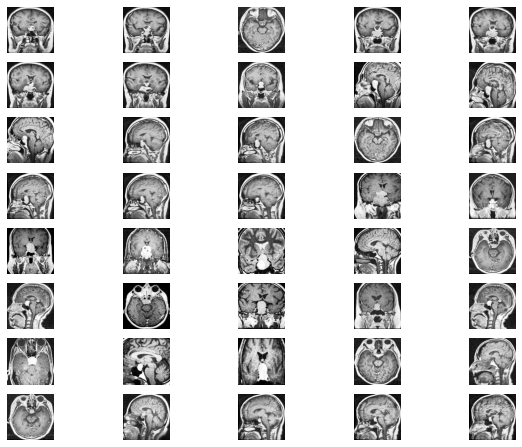

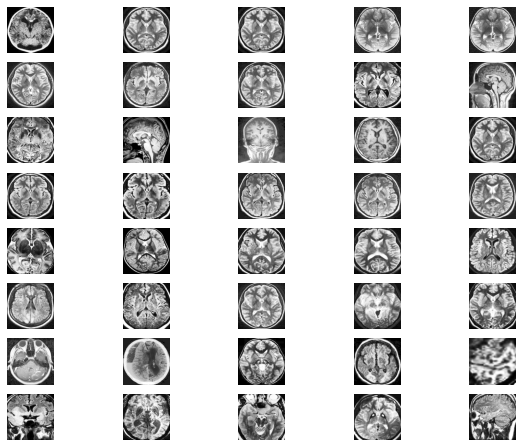

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10,50):
    plt.subplot(10,5,i+1)
    plt.imshow(X_test_crop_p2[i], cmap="gray")
    plt.axis('off')
    #plt.title(classes[label_all_imgs[i]])
#plt.title("Przykładowe zdjecia ze zbioru treningowego")
plt.show()


In [ ]:
def save_new_images(x_set, y_set, folder_name):
    i = 0
    for (img, imclass) in zip(x_set, y_set):
        name= folder_name[61]+ str(i)+ '.png'
        path=os.path.join(folder_name,name )
        cv2.imwrite(path, img)
        i += 1

In [ ]:
path2 = "C:\\STUDIA\PROGRAMOWANIE\\TOMY\\projekt\\Tumor_4classes"
path_training2 = os.path.join(path2, "Training")
path_testing2 = os.path.join(path2, "Testingg")
path_testing_changed = os.path.join(path2, "Testingg_changed")

train_glioma = path_training2 + "\\glioma_tumor"
train_meningioma = path_training2 + "\\meningioma_tumor"
train_no_tumour = path_training2 + "\\no_tumor"
train_pituitary = path_training2 + "\\pituitary_tumor"

test_glioma = path_testing2 + "/glioma_tumor"
test_meningioma = path_testing2 + "/meningioma_tumor"
test_no_tumour = path_testing2 + "/no_tumor"
test_pituitary = path_testing2 + "/pituitary_tumor"

test_glioma2 = path_testing_changed + "/glioma_tumor"
test_meningioma2 = path_testing_changed + "/meningioma_tumor"
test_no_tumour2 = path_testing_changed + "/no_tumor"
test_pituitary2 = path_testing_changed + "/pituitary_tumor"

print(train_glioma)

save_new_images(X_train_crop_g2, y_train_g, folder_name=train_glioma)
save_new_images(X_train_crop_m2, y_train_m, folder_name=train_meningioma)
save_new_images(X_train_crop_n2, y_train_n, folder_name=train_no_tumour)
save_new_images(X_train_crop_p2, y_train_p, folder_name=train_pituitary)

save_new_images(X_test_crop_g2, y_test_g, folder_name=test_glioma2)
save_new_images(X_test_crop_m2, y_test_m, folder_name=test_meningioma2)
save_new_images(X_test_crop_n2, y_test_n, folder_name=test_no_tumour2)
save_new_images(X_test_crop_p2, y_test_p, folder_name=test_pituitary2)

C:\STUDIA\PROGRAMOWANIE\TOMY\projekt\Tumor_4classes\Training\glioma_tumor
